In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import glob
from PIL import Image

Using TensorFlow backend.


In [2]:
image = np.empty((0,3,50,50), dtype=np.uint8)
result = np.empty((0,2), dtype=np.uint8)

list = glob.glob('./work/dataset/apple/*')
for i in list:
    im_reading = np.array( Image.open(i).resize((50,50)))
    im_reading = im_reading.transpose(2,0,1)
    image = np.append(image, [im_reading], axis=0)
    result = np.append(result, np.array([[1,0]]), axis=0)
    
list = glob.glob('./work/dataset/sunflower/*')
for i in list:
    im_reading = np.array( Image.open(i).resize((50,50)))
    im_reading = im_reading.transpose(2,0,1)
    image = np.append(image, [im_reading], axis=0)
    result = np.append(result, np.array([[0,1]]), axis=0)

(18, 3, 50, 50)
[1 0]


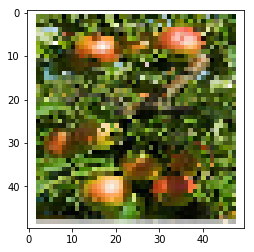

In [3]:
number = 1
print(image.shape)
plt.imshow( image[number].transpose(1,2,0) )
print(result[number])

In [4]:
from sklearn.cross_validation import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(image,result, test_size=0.10, random_state=10)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
model = Sequential()
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu" ,input_shape=(3, 50, 50) ))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(Conv2D(96, 3, 3, border_mode="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), dim_ordering='th'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("relu"))
model.add(Dense(2))
model.add(Activation("sigmoid"))
#model.summary()
model.compile(loss='binary_crossentropy', optimizer="adadelta", metrics=['accuracy'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", input_shape=(3, 50, 50..., padding="same")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), activation="relu", padding="same")`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Ker

In [6]:
hist = model.fit(data_train, labels_train, nb_epoch=20, batch_size=32, validation_data=(data_test, labels_test))

/opt/conda/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 16 samples, validate on 2 samples
Epoch 1/20
16/16 [==============================] - 4s 264ms/step - loss: 9.0510 - acc: 0.3750 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/20
16/16 [==============================] - 1s 67ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/20
16/16 [=====================

In [7]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

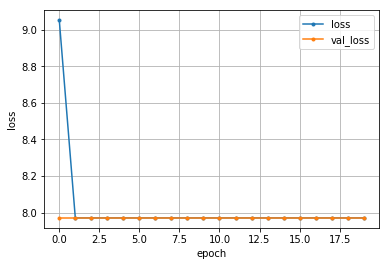

In [8]:
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()